In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import data_loading_plotting_fct as dlp

In [3]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","number of new individual","mean fit","median fit","std fit","max fit","min fit"])


# Asynchronous vs Synchronous

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

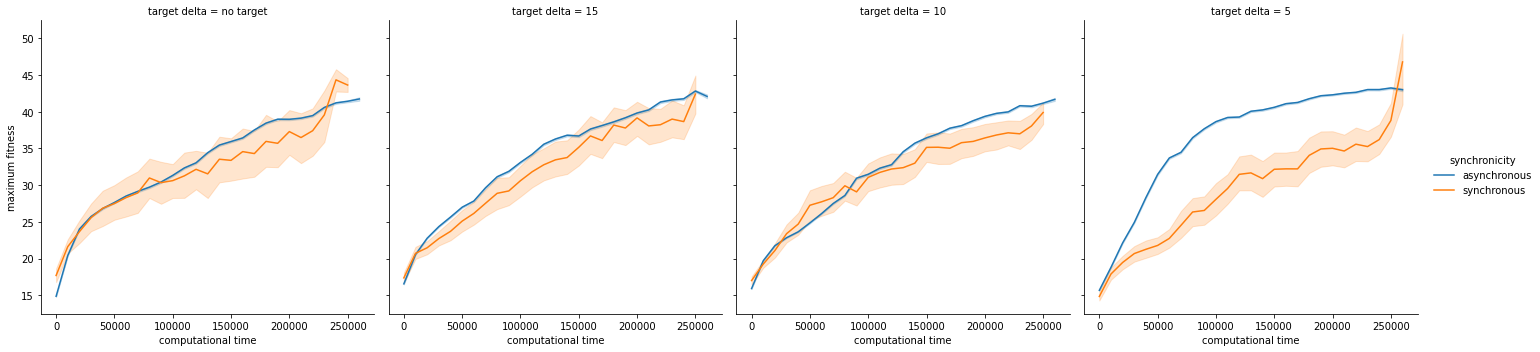

In [4]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="synchronicity",col="target delta",col_order=["no target","15","10","5"])
g.set_axis_labels("computational time","maximum fitness")


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

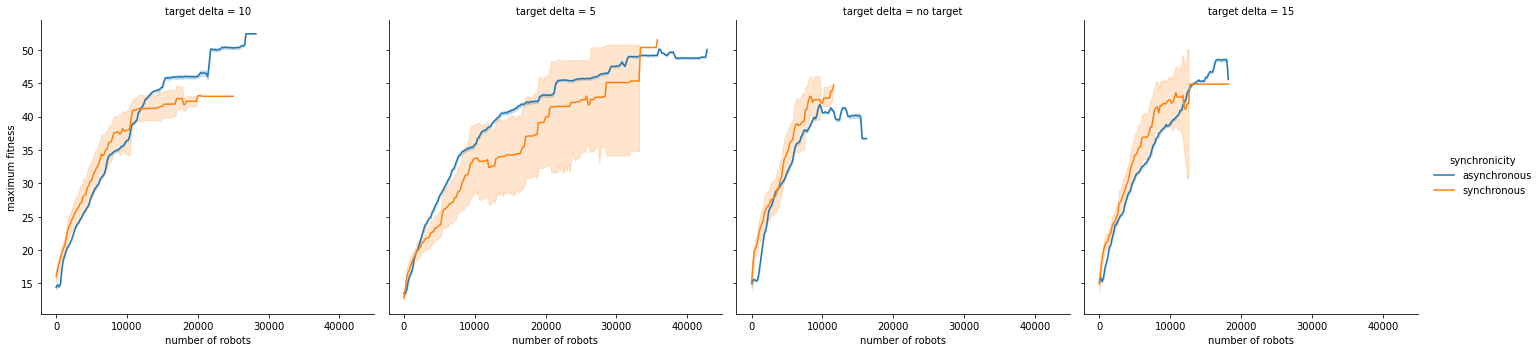

In [5]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="Number of robots",y="max fit",hue="synchronicity",col="target delta")
g.set_axis_labels("number of robots","maximum fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

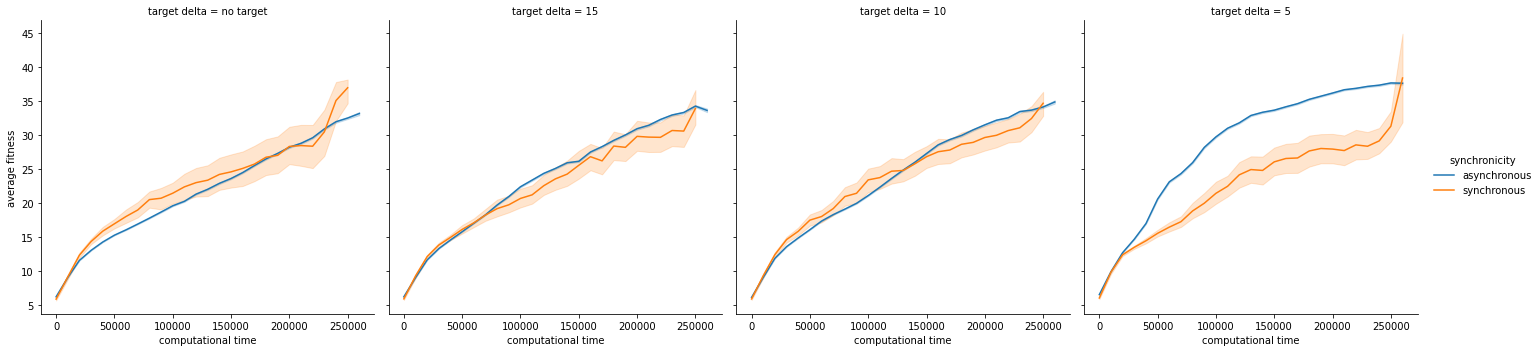

In [5]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="mean fit",hue="synchronicity",col="target delta",col_order=["no target","15","10","5"])
g.set_axis_labels("computational time","average fitness")

# Target Delta values for Asynchronous

(0.0, 250000.0)

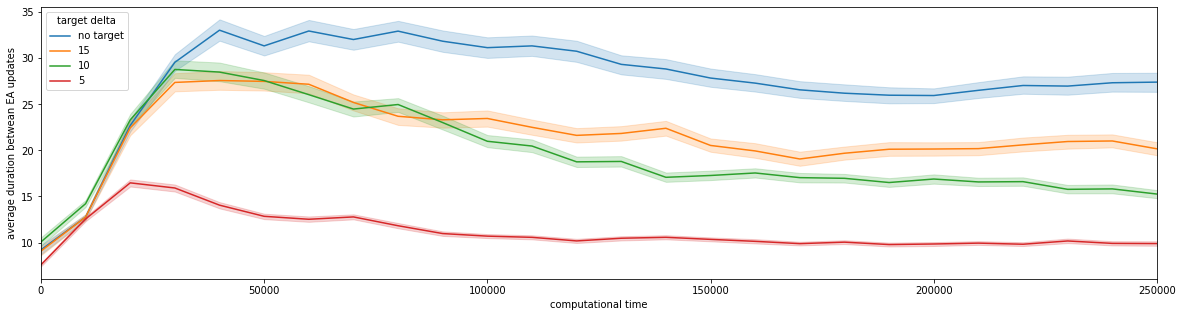

In [27]:
fig = plt.gcf()
fig.set_size_inches(20,5)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="time",hue="target delta",hue_order=["no target","15","10","5"])
ax.set_xlabel("computational time")
ax.set_ylabel("average duration betwean EA updates")
ax.set_xlim([0,250000])

(0.0, 250000.0)

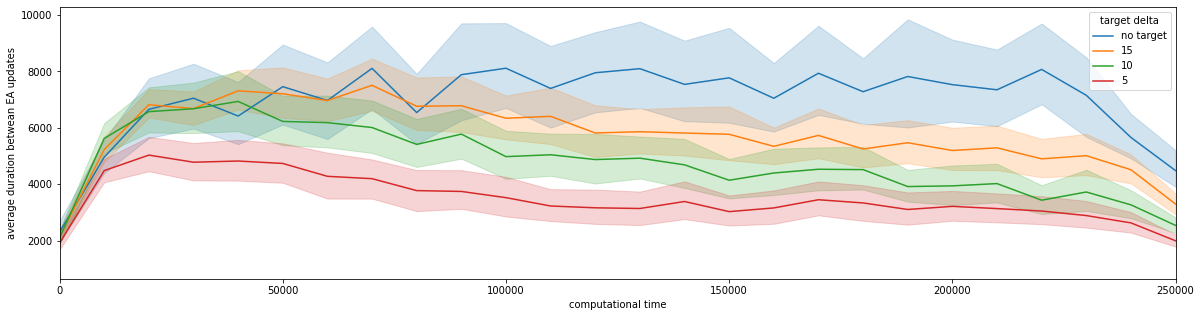

In [28]:
fig = plt.gcf()
fig.set_size_inches(20,5)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="synchronous"],x="discretized time",y="time",hue="target delta",hue_order=["no target","15","10","5"])
ax.set_xlabel("computational time")
ax.set_ylabel("average duration betwean EA updates")
ax.set_xlim([0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

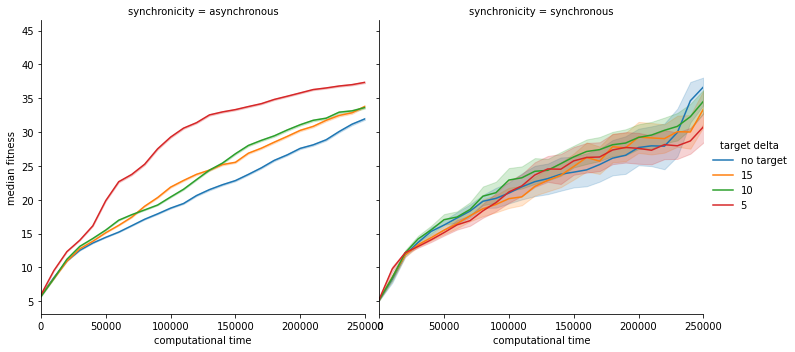

In [25]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median fit",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","median fitness")
g.set(xlim=[0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

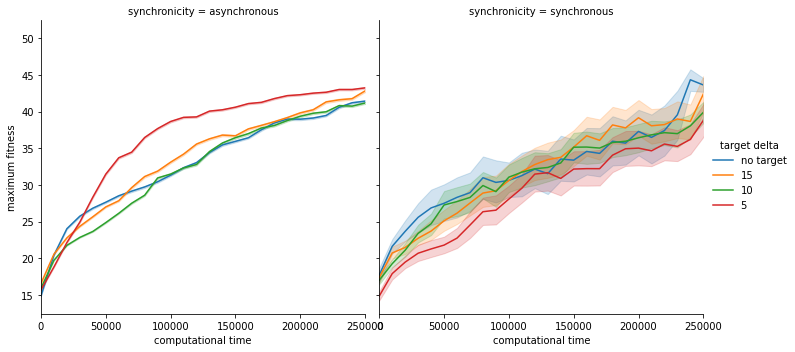

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","maximum fitness")
g.set(xlim=[0,250000])

(0.0, 250000.0)

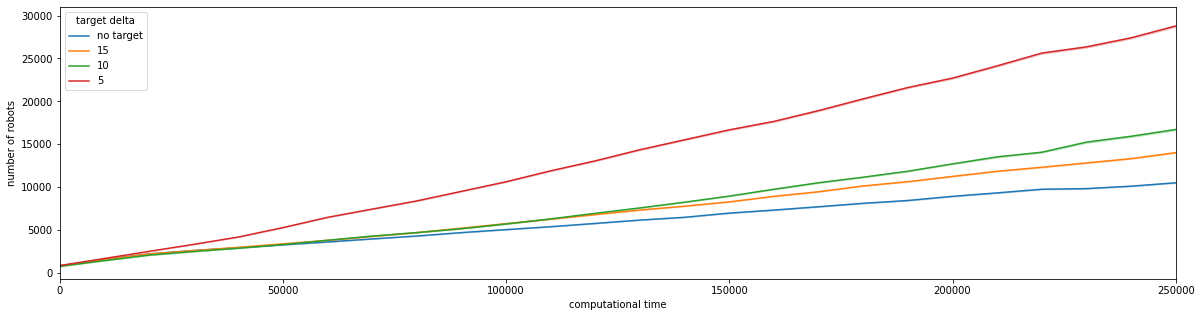

In [29]:
fig = plt.gcf()
fig.set_size_inches(20,5)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="number of robots",hue="target delta",hue_order=["no target","15","10","5"])
ax.set_xlabel("computational time")
ax.set_ylabel("number of robots")
ax.set_xlim([0,250000])

(0.0, 250000.0)

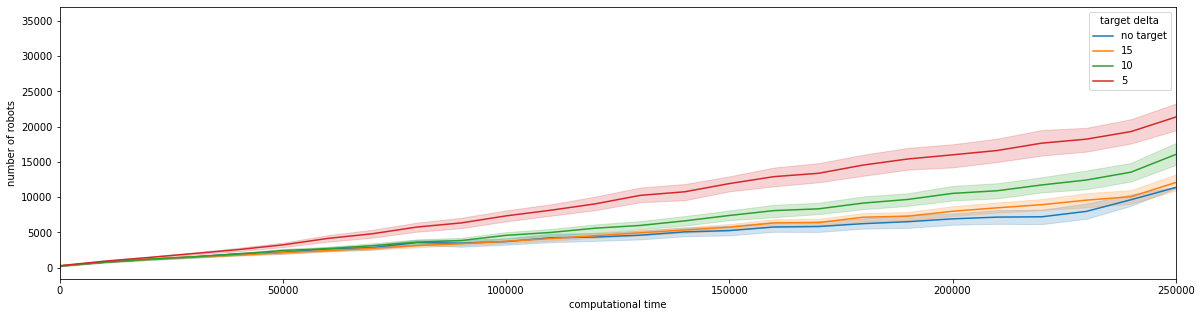

In [30]:
fig = plt.gcf()
fig.set_size_inches(20,5)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="synchronous"],x="discretized time",y="number of robots",hue="target delta",hue_order=["no target","15","10","5"])
ax.set_xlabel("computational time")
ax.set_ylabel("number of robots")
ax.set_xlim([0,250000])

In [31]:
new_data_list = []
for sync in fit_data["synchronicity"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["synchronicity"]==sync]
    for td in tmp_data["target delta"].drop_duplicates():
        tmp_data = fit_data.loc[fit_data["synchronicity"]==sync].loc[fit_data["target delta"]==td]
        for rep in tmp_data["replicate"].drop_duplicates():
            new_data = pd.DataFrame(tmp_data.loc[tmp_data["replicate"]==rep].max())
            new_data_list.append(new_data.transpose())
max_data = pd.concat(new_data_list)
print(max_data)



   synchronicity target delta                                replicate  \
0   asynchronous           10  m2w_2023_11_10_17_27_22_702801_13464928   
0   asynchronous           10   m2w_2023_12_11_16_14_0_517784_10826179   
0   asynchronous           10     m2w_2023_11_15_9_51_48_47850_2568896   
0   asynchronous           10   m2w_2023_12_1_10_30_43_766687_16242240   
0   asynchronous           10   m2w_2023_11_22_10_22_47_146866_9627554   
..           ...          ...                                      ...   
0    synchronous           15  m2w_2023_11_13_17_29_56_708676_13599796   
0    synchronous           15  m2w_2023_12_14_16_15_12_691442_15412203   
0    synchronous           15      m2w_2023_12_5_9_29_8_338994_5879153   
0    synchronous           15    m2w_2023_11_30_10_24_41_848930_160201   
0    synchronous           15    m2w_2023_11_10_17_27_35_64401_4738013   

            time computation time discretized time Number of robots  \
0      847.48054    258676.748211       

/tmp/ipykernel_29406/1920087517.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"],dodge=True,color='k')


<Axes: xlabel='target delta', ylabel='number of robots'>

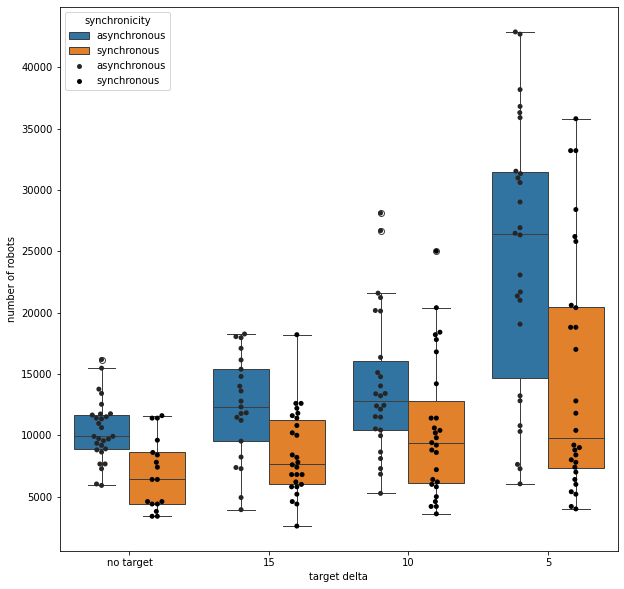

In [32]:
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = sns.boxplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"])
sns.swarmplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"],dodge=True,color='k')

/tmp/ipykernel_29406/3733805837.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(data=max_data,x="target delta",y="max fit",hue="synchronicity",order=["no target","15","10","5"],dodge=True,color='k')


<Axes: xlabel='target delta', ylabel='max fit'>

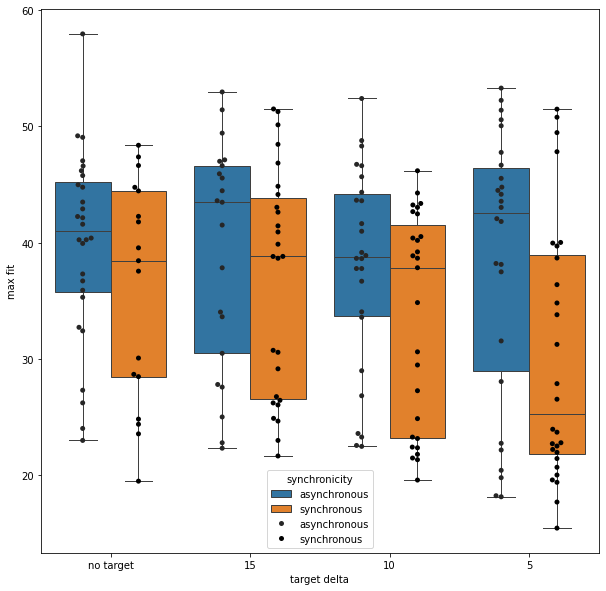

In [33]:
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = sns.boxplot(data=max_data,x="target delta",y="max fit",hue="synchronicity",order=["no target","15","10","5"])
sns.swarmplot(data=max_data,x="target delta",y="max fit",hue="synchronicity",order=["no target","15","10","5"],dodge=True,color='k')

# Learning Delta and Trials

In [34]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_learning_data_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","mean delta","median delta","std delta","max delta","min delta","mean trials","median trials","std trials","max trials","min trials"])



/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

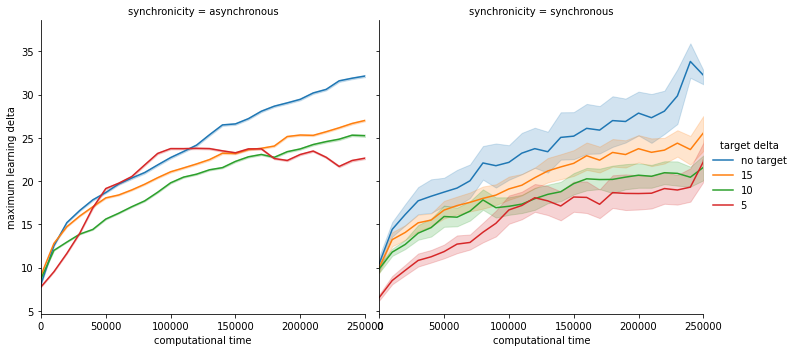

In [35]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max delta",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","maximum learning delta")
g.set(xlim=[0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

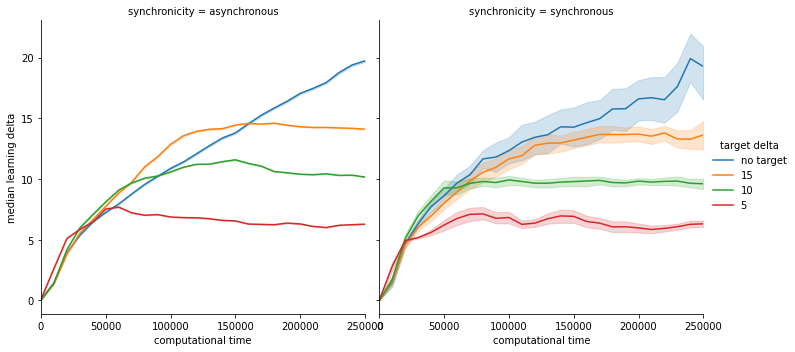

In [36]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median delta",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","median learning delta")
g.set(xlim=[0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

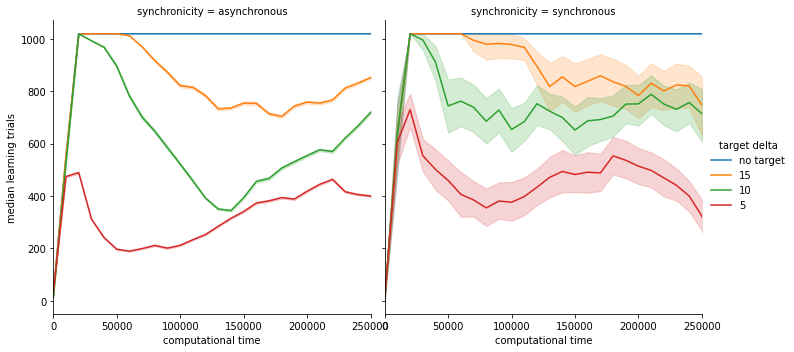

In [37]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median trials",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","median learning trials")
g.set(xlim=[0,250000])

# Morphiligical diversity

In [40]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_morph_norms_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","mean morph norm","median morph norm","std morph norm","max morph norm","min morph norm"])


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

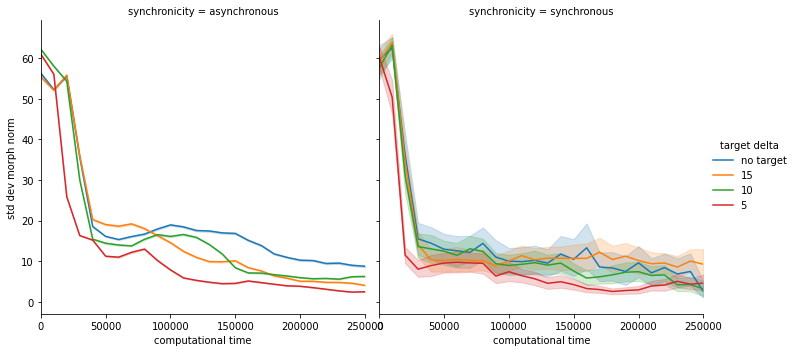

In [41]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="std morph norm",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","std dev morph norm")
g.set(xlim=[0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

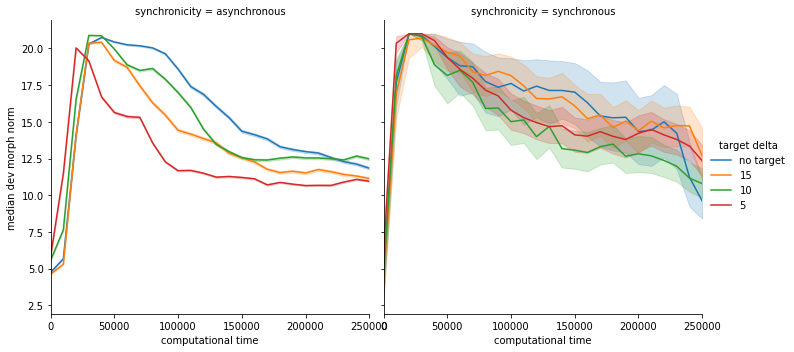

In [42]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median morph norm",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","median morph norm")
g.set(xlim=[0,250000])

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x720 with 0 Axes>

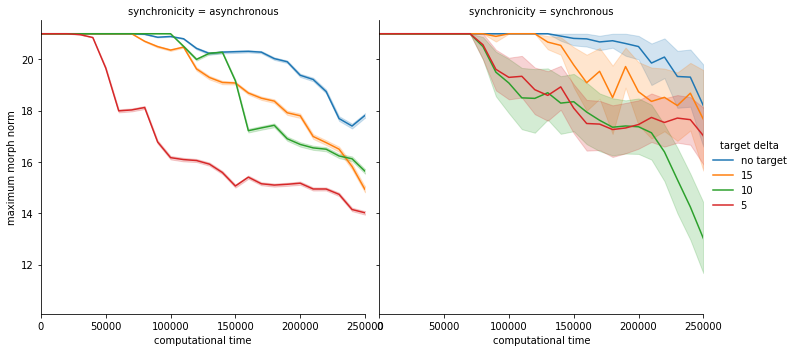

In [44]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max morph norm",hue="target delta",col="synchronicity",hue_order=["no target","15","10","5"])
g.set_axis_labels("computational time","maximum morph norm")
g.set(xlim=[0,250000])